In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [ ]:
pd.options.display.float_format = '{:.1f}'.format

In [ ]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
#데이터의 정규 분포도에 따라 예측 성능 영향을 받을 수 있으므로, 정규 분포 형태의 표준 스케일링 적용 -> 데이터 분리 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

#로지스틱 회귀를 이용하여 학습 및 예측 수행(solver는 default인 '1bfgs'적용)
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

#정확도와 roc_auc 값 구하기 
print(f'accuracy:{round(accuracy_score(y_test, lr_preds),4)}, roc_auc:{round(roc_auc_score(y_test, lr_preds),4)}')

accuracy:0.9766, roc_auc:0.9716


In [ ]:
#과제_1011_1
#여러개의 solver 값별로 LogisticRegression 학습 후 성능 평가(최적화 방안) - accuracy, roc_auc

solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']

# 여러개의 solver 값별로 LogisticRegression 학습 후 성능 평가
for solver in solvers:
    lr_clf = LogisticRegression(solver=solver, max_iter=600)
    lr_clf.fit(X_train, y_train)
    lr_preds = lr_clf.predict(X_test)
    
    # accuracy와 roc_auc 측정
    print('solver:{0}, accuracy: {1:.3f}, roc_auc:{2:.3f}'.format(solver,
                                                                  accuracy_score(y_test, lr_preds),
                                                                  roc_auc_score(y_test , lr_preds)))
    
#데이터 세트가 워낙 작기에 개별 solver별 차이가 크지 않음

solver:lbfgs, accuracy: 0.977, roc_auc:0.972
solver:liblinear, accuracy: 0.982, roc_auc:0.979
solver:newton-cg, accuracy: 0.977, roc_auc:0.972
solver:sag, accuracy: 0.982, roc_auc:0.979
solver:saga, accuracy: 0.982, roc_auc:0.979


In [ ]:
#과제_1011_2 GridSearchCV를 이용하여 최적 하이퍼 파라미터 및 최적 평균 정확도를 구하세요.
from sklearn.model_selection import GridSearchCV

params = {'solver':['lbfgs','liblinear' ],
         'penalty':['l2','l1'],
         'C':[0.01, 0.1, 1.5, 10]}

lr_clf = LogisticRegression()

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}, 최적 평균 정확도:0.979


## 회귀트리

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd

In [ ]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [ ]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

bostonDF['PRICE'] = boston.target
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.0,18.0,2.3,0.0,0.5,6.6,65.2,4.1,1.0,296.0,15.3,396.9,5.0,24.0
1,0.0,0.0,7.1,0.0,0.5,6.4,78.9,5.0,2.0,242.0,17.8,396.9,9.1,21.6
2,0.0,0.0,7.1,0.0,0.5,7.2,61.1,5.0,2.0,242.0,17.8,392.8,4.0,34.7
3,0.0,0.0,2.2,0.0,0.5,7.0,45.8,6.1,3.0,222.0,18.7,394.6,2.9,33.4
4,0.1,0.0,2.2,0.0,0.5,7.1,54.2,6.1,3.0,222.0,18.7,396.9,5.3,36.2


In [ ]:
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_mse = np.mean(rmse_scores)

print(np.round(neg_mse_scores, 2))
print(np.round(rmse_scores, 2))
print(np.round(avg_mse, 4))

[ -7.88 -13.14 -20.57 -46.23 -18.88]
[2.81 3.63 4.54 6.8  4.34]
4.4225


In [ ]:
#과제_1011_3 회귀트리 모델들을 이용하여 모델링 및 평가를 수행하세요
# (def get_model_cv_predict(model, X_data, y_target ))


#입력 모델과 데이터 세트를 입력받아 교차 검증으로 평균 RMSE를 계산해주는 함수 
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(- 1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('####', model.__class__.__name__, '####')
    print('5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

df_reg = DecisionTreeRegressor(random_state = 0, max_depth=4) 
rf_reg = RandomForestRegressor(random_state = 0, n_estimators=1000)  #n_estimators 결정 트리의 개수
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

#트리 기반의 회귀 모델을 반복하면서 평가 수행

models = [df_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]

for model in models:
    get_model_cv_prediction(model, X_data, y_target)


#### DecisionTreeRegressor ####
5 교차 검증의 평균 RMSE : 5.978
#### RandomForestRegressor ####
5 교차 검증의 평균 RMSE : 4.423
#### GradientBoostingRegressor ####
5 교차 검증의 평균 RMSE : 4.269
#### XGBRegressor ####
5 교차 검증의 평균 RMSE : 4.251
#### LGBMRegressor ####
5 교차 검증의 평균 RMSE : 4.646


<AxesSubplot:>

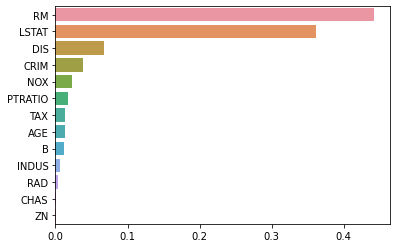

In [ ]:
#Regressor 클래스에서는 feature_importances_로 피처별 중요도 파악 

import seaborn as sns
%matplotlib inline

#랜덤 포레스트가 RMSE 값이 가장 좋아서 
rf_reg = RandomForestRegressor(n_estimators=1000)

#앞에서 만들어진 X_data, y_target 데이터 세트를 적용해 학습

rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

#### 회귀 트리 Regressor가 어떻게 예측값을 판단하는지 선형 회귀와 비교해 시각화

(100, 2)


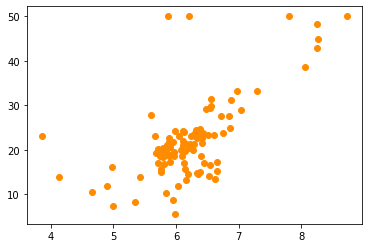

In [ ]:
#보스턴 데이터 세트의 개수를 100개만 샘플링하고 RM, PRICE 칼럼만 추출
#독립변수 rm, 종속변수price를 가지고 직관적으로 예측값 시각화 -> 산점도 형태로

bostonDF_sample = bostonDF[['RM', 'PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100, random_state=0)
print(bostonDF_sample.shape)

plt.figure()
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')


In [ ]:
# 선형회귀와 결정트리를 max_depth를 2,7로 해서 학습
# 학습후, RM 값을 4.5~8.5까지의 100개의 테스트 데이터 세트로 제공했을 때 예측값 구하기
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

#실제 예측을 적용할 테스트용 데이터 세트를 4.5~8.5까지의 100개 데이터 세트로 생성
X_test = np.arange(4.5, 8.5, 0.4).reshape(-1, 1)

#보스턴 주택 가격 데이터에서 시각화를 위한 피처는 RM만, 결정 데이터 PRICE 추출
X_feature = bostonDF_sample['RM'].values.reshape(-1,1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1,1)

#학습과 예측 수행
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

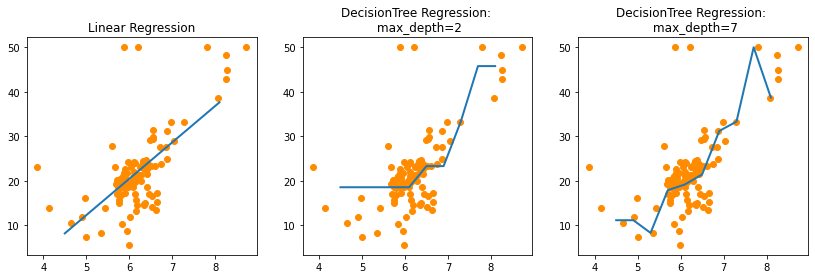

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

#X 축 값을 4.5~8.5로 변환하며, 입력했을 때 선형회귀와 결정 트리 회귀 예측선 시각화

#선형 회귀로 학습된 모델 회귀 예측선 -> 직선으로 예측 회귀선 표현 
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM,bostonDF_sample.PRICE, c='darkorange')
ax1.plot(X_test, pred_lr, label='linear', linewidth=2)

#회귀 트리의 경우 분할되는 데이터 지점에 따라 브랜치를 만들면서 계단 형태로 회귀선을 만듦
#DecisionTreeRegressor의 max_depth 2로 했을때 회귀 예측선 
ax2.set_title('DecisionTree Regression: \n max_depth=2')
ax2.scatter(bostonDF_sample.RM,bostonDF_sample.PRICE, c='darkorange')
ax2.plot(X_test, pred_rf2, label='max_depth: 2', linewidth=2)

#DecisionTreeRegressor의 max_depth 7로 했을때 회귀 예측선 -> 이상치 데이터도 학습하며, 복잡한 계단 형태의 회귀선, 과적합이 되기 쉬운 모델 
ax3.set_title('DecisionTree Regression: \n max_depth=7')
ax3.scatter(bostonDF_sample.RM,bostonDF_sample.PRICE, c='darkorange')
ax3.plot(X_test, pred_rf7, label='max_depth: 7', linewidth=2)

## Regression 실습 - Bike Sharing Demand

cf) https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

bike_df = pd.read_csv('bike_train.csv')
print(bike_df.shape)
bike_df.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.8,14.4,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.0,13.6,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.0,13.6,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.8,14.4,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.8,14.4,75,0.0,0,1,1


In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
#문자열을 datetime 타입으로 변경

bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

bike_df['year'] = bike_df.datetime.apply(lambda x: x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x: x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x: x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x: x.hour)

bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.8,14.4,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.0,13.6,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.0,13.6,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.8,14.4,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.8,14.4,75,0.0,0,1,1,2011,1,1,4


In [ ]:
drop_columns = ['datetime', 'casual', 'registered']
bike_df.drop(drop_columns, axis=1, inplace=True)

In [ ]:
bike_df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'count', 'year', 'month', 'day', 'hour'],
      dtype='object')

#### target 값인 count가 어떻게 분포되어있는지 시각화 

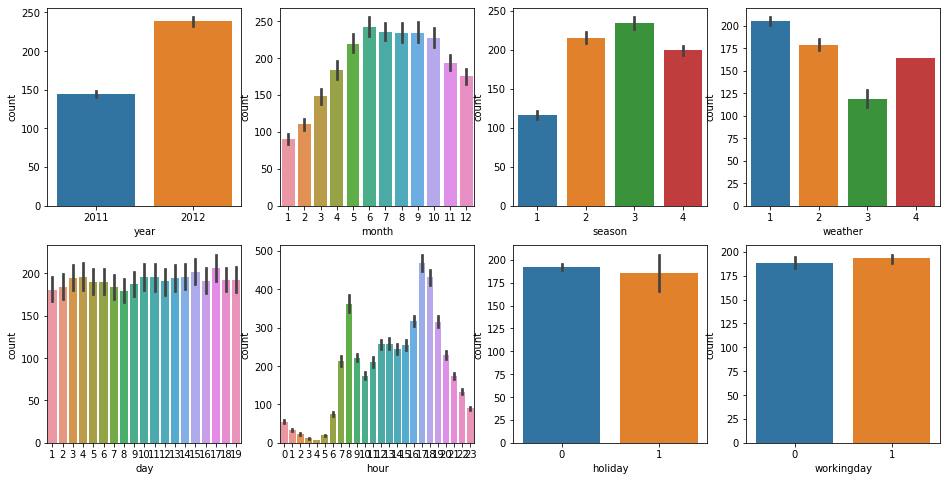

In [ ]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
cat_features = ['year','month', 'season', 'weather','day', 'hour','holiday', 'workingday']

for i, feature in enumerate(cat_features):
    row = int(i/4)
    col = i % 4
    sns.barplot(x=feature, y='count', data=bike_df, ax=axs[row][col])

## 로그 변환
https://suppppppp.github.io/posts/Why-Series-MDM-1/
![nn](log.png)
![nn](log2.png)
![nn](log3.png)
![nn](log4.png)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

#log값 변환시 NaN등의 이슈로 log()가 아닌 log1p()를 이용해 RMSLE 계산

def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

def evaluate_regr(y, pred):
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    
    #MAE는 사이킷런의 mean_absolute_error()로 계산
    mae_val = mean_absolute_error(y, pred)
    
    print(f'rmsle:{round(rmsle_val, 4)}, rmse:{round(rmse_val, 4)}, mae:{round(mae_val, 4)}')
    
    

In [ ]:
#로그변환, 모델 학습/예측/평가
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = bike_df['count']
X_features = bike_df.drop(['count'], axis = 1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test, pred)

#예측오류가 큰 경우, target 값의 분포가 왜곡된 분포를 이루고 있는지 확인한다.

rmsle:1.1647, rmse:140.8996, mae:105.9244


<AxesSubplot:>

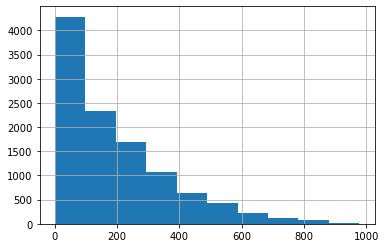

In [ ]:
#target 분포 확인.
y_target.hist()

#0~200 사이에 왜곡돼 있음.

<AxesSubplot:>

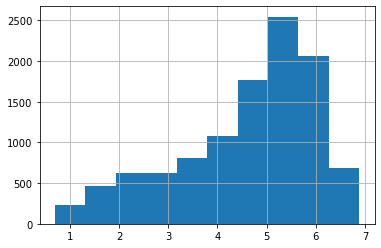

In [ ]:
#로그를 적용해 정규 분포 형태로 바꿔줌.

y_log_transform = np.log1p(y_target)
y_log_transform.hist()

#왜곡 정도가 많이 향상됨.

#### [과제_1011_4]. 상기 사례에 대하여 로그 변환을 수행 후 모델링 및 평가를 수행하세요.(LinearRegression 적용)

In [ ]:
# 타깃 칼럼인 count값을 log1p로 로그 변환
y_target_log = np.log1p(y_target)

#로그 변환된 y_target_log를 반영해 학습/테스트 데이터 세트 분할

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=0)

#이렇게 변경된 target 기반으로 학습하고, 예측한 값은 원래 scale로 원상복구하면됨.
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

#테스트 데이터 세트의 target 값은 로그 변환 됐으니 다시 expm1을 이용해 원래 스케일로 변환
y_test_exp = np.expm1(y_test)

#예측값 역시 로그 변환된 타깃 기반으로 학습돼 예측했으니, 다시 스케일 변환
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp, pred_exp)


#rmsle 오류는 줄었지만, rmse는 오히려 더 늘었음

rmsle:1.0168, rmse:162.5943, mae:109.2862


<AxesSubplot:>

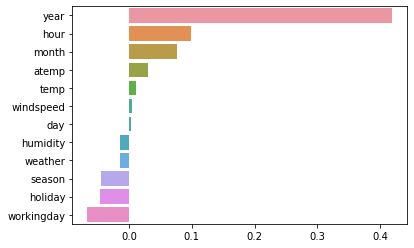

In [ ]:
#피처별 중요도 확인

coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y= coef_sort.index)

#year, hour, month, season, holiday, workingday 피처들의 회귀 계수 영향도가 상대적으로 높음
#year, hour, month 등은 숫자 값으로 표현 되었지만 개별 숫자값의 크기가 의미 있는것이 아님 -> 카테고리형 피처

#### [과제_1011_5]. 상기 사례에 대하여 추가로 카테고리형 변수에 대하여 인코딩 적용 후 모델링 및 평가를 수행하세요.

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
#원핫인코딩

X_features_ohe = pd.get_dummies(X_features, columns=['year', 'month', 'day', 'hour', 'holiday', 'workingday', 'season', 'weather'])

#원핫 인코딩이 적용된 피처 데이터 세트 기반으로 학습/예측 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log, test_size=0.3, random_state=0)

#모델과 학습/데이터 세트를 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('♡♡♡', model.__class__.__name__, '♡♡♡')
    evaluate_regr(y_test, pred)
    
#모델별로 예측 수행 
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)
    
#원핫 인코딩으로 선형 회귀 예측 성능이 좋아짐

♡♡♡ LinearRegression ♡♡♡
rmsle:0.5896, rmse:97.6878, mae:63.3821
♡♡♡ Ridge ♡♡♡
rmsle:0.5901, rmse:98.5286, mae:63.8934
♡♡♡ Lasso ♡♡♡
rmsle:0.6348, rmse:113.2188, mae:72.8027


<AxesSubplot:>

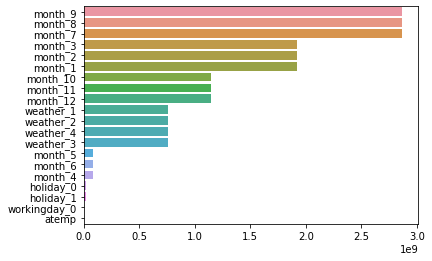

In [ ]:
#원핫 인코딩 적용후 데이터 세트에서 회귀 계수가 높은 피처를 다시 시각화
#원핫 인코딩으로 피처가 늘어났으니 회귀 계수 상위 25개 추출
coef = pd.Series(lr_reg.coef_, index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values, y=coef_sort.index)

#### [과제_1011_5]. 회귀 트리 모델들을 적용하여 모델링 및 평가를 수행하세요.

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

#랜덤 포레스트, GBM, XGBoost, LIGHTGBM model 별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg,gbm_reg,xgb_reg,lgbm_reg]:
    #XGBoost의 경우, DataFrame이 입력될 경우, 버전에 따라 오류 발생 가능, ndarray로 변환
    get_model_predict(model, X_train.values, X_test.values, y_train.values, y_test.values, is_expm1=True)

♡♡♡ RandomForestRegressor ♡♡♡
rmsle:0.3544, rmse:50.2379, mae:31.1361
♡♡♡ GradientBoostingRegressor ♡♡♡
rmsle:0.3299, rmse:53.3307, mae:32.7376
♡♡♡ XGBRegressor ♡♡♡
rmsle:0.3422, rmse:51.7316, mae:31.2512
♡♡♡ LGBMRegressor ♡♡♡
rmsle:0.3188, rmse:47.2146, mae:29.0288
